# Nandini Dhakad

# Task 2: Customer Segment Prediction

# Codeclause

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [52]:
!pip install scikit-learn

In [9]:
df=pd.read_csv("C:/Users/HP/Desktop/codeclause/archive (3)/Mall_Customers.csv")

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.rename(columns={'Genre':'Gender'},inplace=True)

In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.shape

(200, 5)

In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [17]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [18]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [19]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\HP\AppData\Local\Temp\ipykernel_9860\2656100658.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],bins=20)
C:\Users\HP\AppData\Local\Temp\ipykernel_9860\2656100658.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],bins=20)
C:\Users\HP\AppData\Local\Temp\ipykernel_9860\26

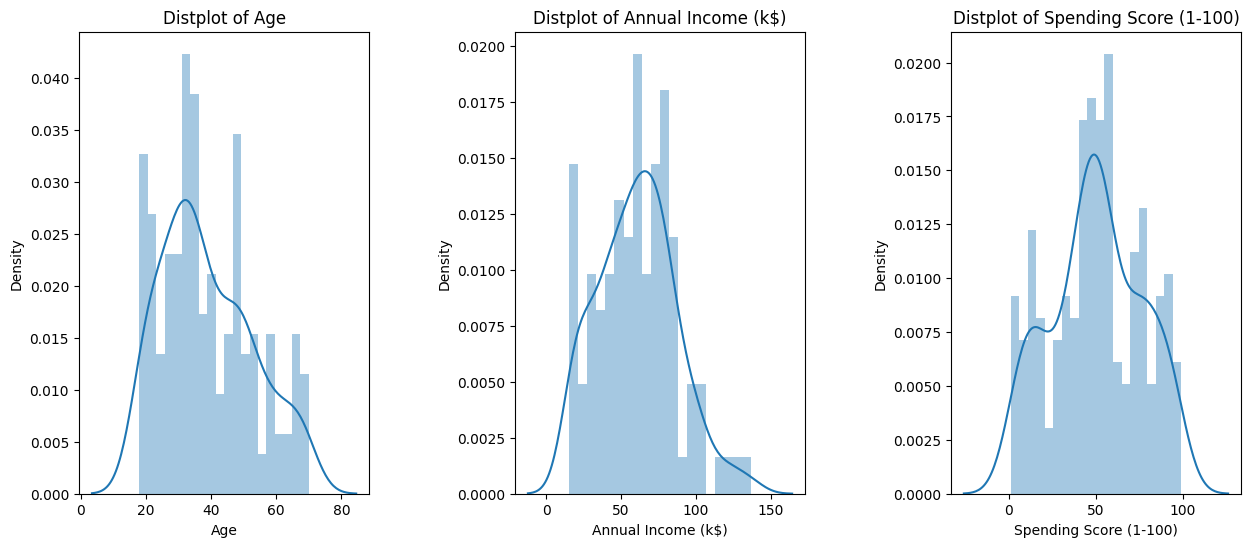

In [26]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

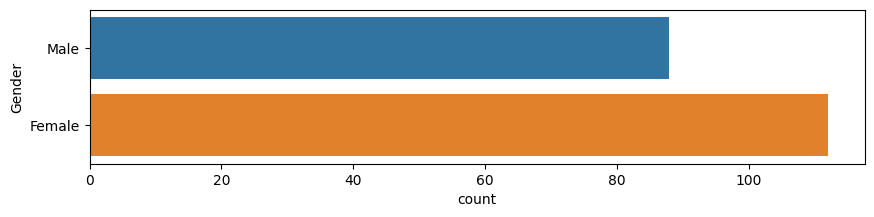

In [29]:
plt.figure(figsize=(10,2))
sns.countplot(y='Gender',data=df)
plt.show()

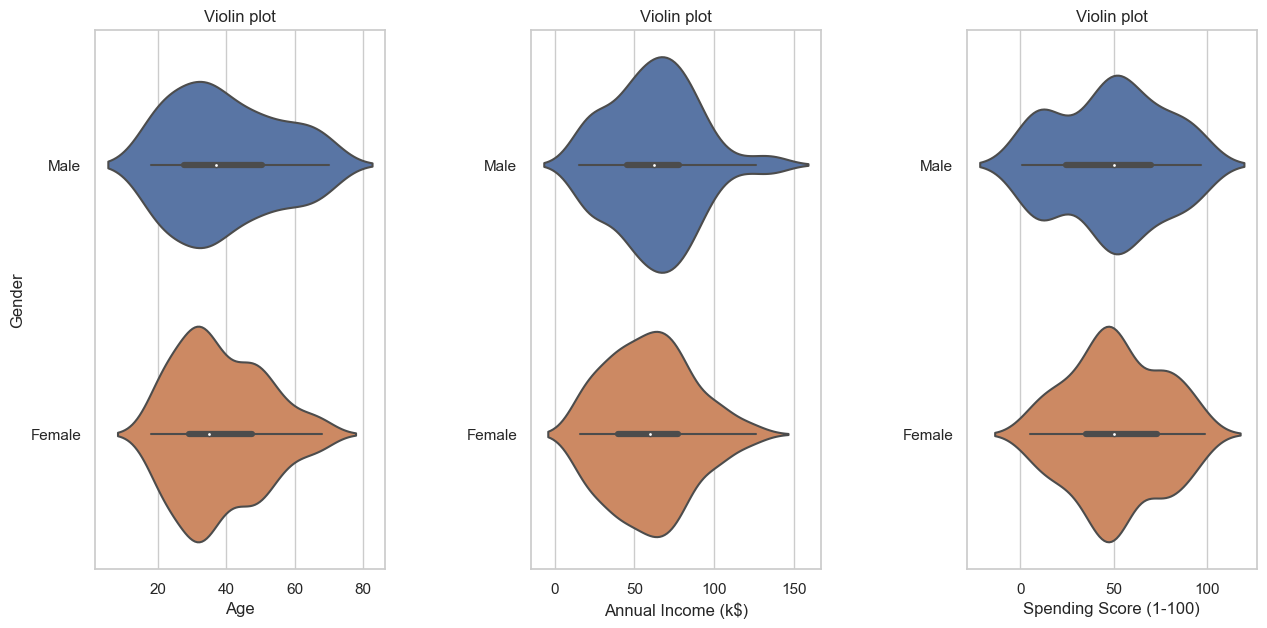

In [32]:
plt.figure(1, figsize=(15,7))
n=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='Gender',data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin plot')
plt.show()

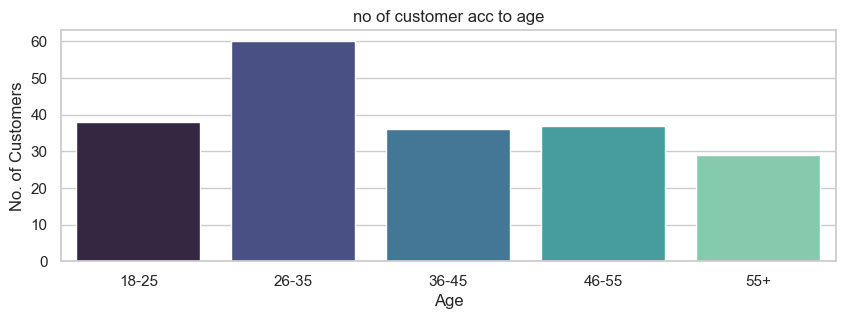

In [35]:
age_18_25=df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35=df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45=df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55=df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above=df.Age[(df.Age >= 56)]

agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(10,3))
sns.barplot(x=agex,y=agey,palette="mako")
plt.title("no of customer acc to age")
plt.xlabel('Age')
plt.ylabel('No. of Customers')
plt.show()


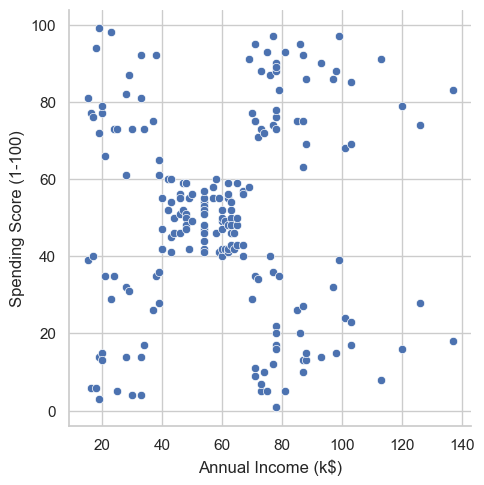

In [37]:
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)", data=df)

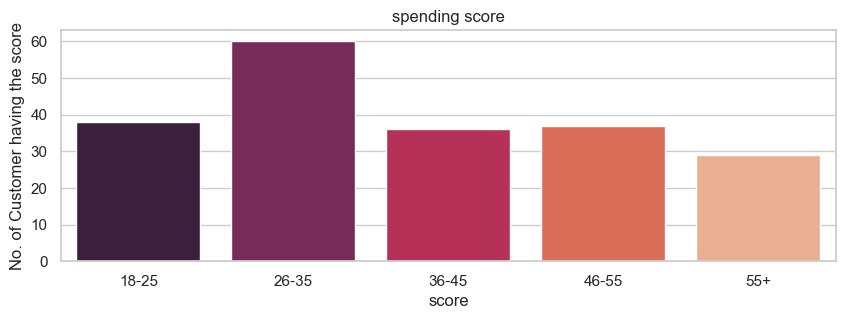

In [39]:
ss_1_20=df["Spending Score (1-100)"][(df['Spending Score (1-100)'] >=1) & (df['Spending Score (1-100)'] <= 20)]
ss_21_40=df["Spending Score (1-100)"][(df['Spending Score (1-100)'] >=21) & (df['Spending Score (1-100)'] <= 40)]
ss_41_60=df["Spending Score (1-100)"][(df['Spending Score (1-100)'] >=41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_80=df["Spending Score (1-100)"][(df['Spending Score (1-100)'] >=61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_100=df["Spending Score (1-100)"][(df['Spending Score (1-100)'] >=81) & (df['Spending Score (1-100)'] <= 100)]

ssx=["1-20","21-40","41-60","61-80","81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(10,3))
sns.barplot(x=agex,y=agey,palette="rocket")
plt.title("spending score")
plt.xlabel('score')
plt.ylabel('No. of Customer having the score')
plt.show()

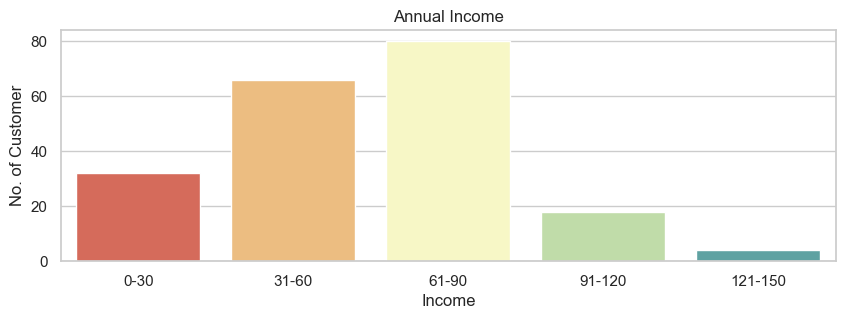

In [40]:
AI0_30=df["Annual Income (k$)"][(df["Annual Income (k$)"] >=0) & (df["Annual Income (k$)"] <= 30)]
AI31_60=df["Annual Income (k$)"][(df["Annual Income (k$)"] >=31) & (df["Annual Income (k$)"] <= 60)]
AI61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"] >=61) & (df["Annual Income (k$)"] <= 90)]
AI91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"] >=91) & (df["Annual Income (k$)"] <= 120)]
AI121_150=df["Annual Income (k$)"][(df["Annual Income (k$)"] >=121) & (df["Annual Income (k$)"] <= 150)]

AIx=["0-30","31-60","61-90","91-120","121-150"]
AIy=[len(AI0_30.values),len(AI31_60.values),len(AI61_90.values),len(AI91_120.values),len(AI121_150.values)]

plt.figure(figsize=(10,3))
sns.barplot(x=AIx,y=AIy,palette="Spectral")
plt.title("Annual Income")
plt.xlabel('Income')
plt.ylabel('No. of Customer')
plt.show()

C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change

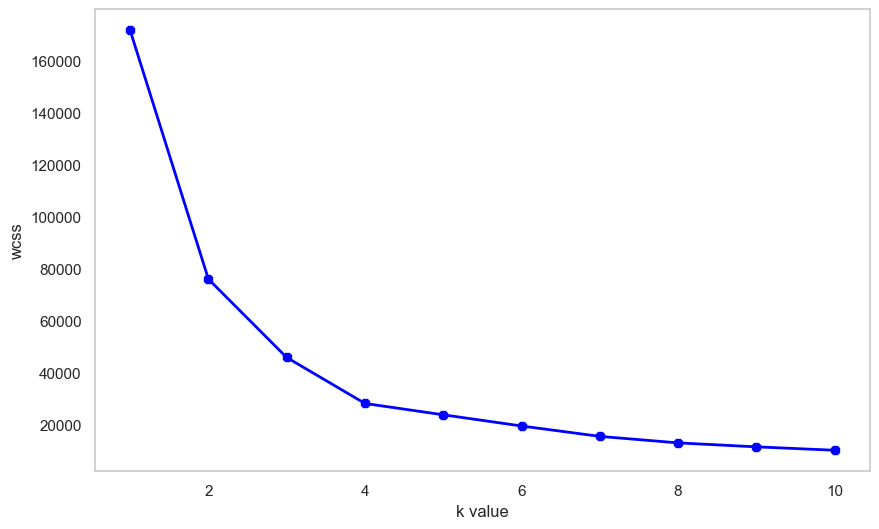

In [69]:
x1=df.loc[:,['Age','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel("k value")
plt.ylabel('wcss')
plt.show()

In [71]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(x1)
print(label)

[1 0 3 0 1 0 3 0 3 0 3 0 3 0 3 0 1 1 3 0 1 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3
 0 3 0 2 0 2 1 3 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 1 1 1 1 2 2 2 2 1 1 1 0 1 0 2 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 2 0
 3 0 3 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 1
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [72]:
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


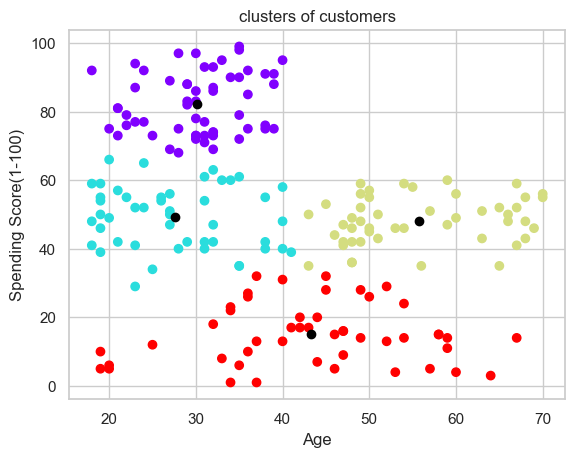

In [77]:
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title("clusters of customers")
plt.xlabel("Age")
plt.ylabel("Spending Score(1-100)")
plt.show()

C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change

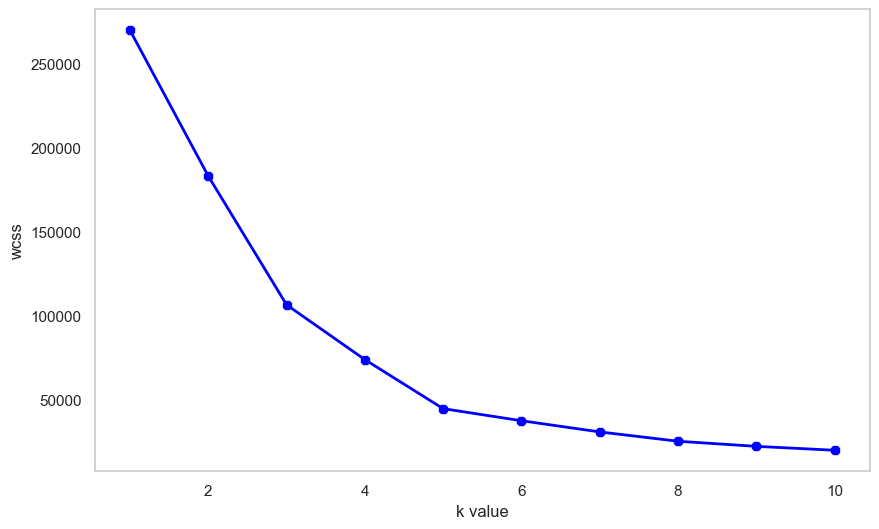

In [78]:
x2=df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel("k value")
plt.ylabel('wcss')
plt.show()

In [79]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x2)
print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [80]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


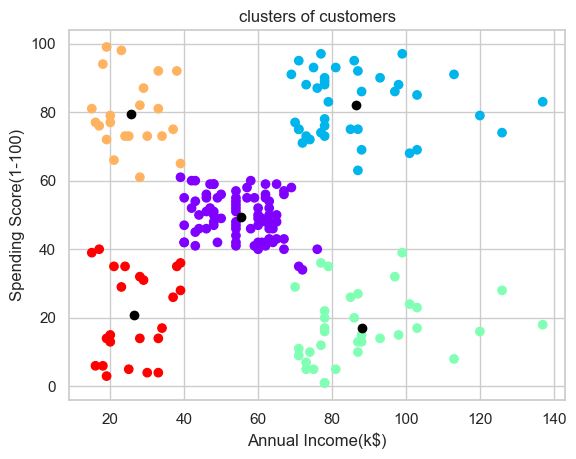

In [81]:
plt.scatter(x2[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title("clusters of customers")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score(1-100)")
plt.show()

C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change

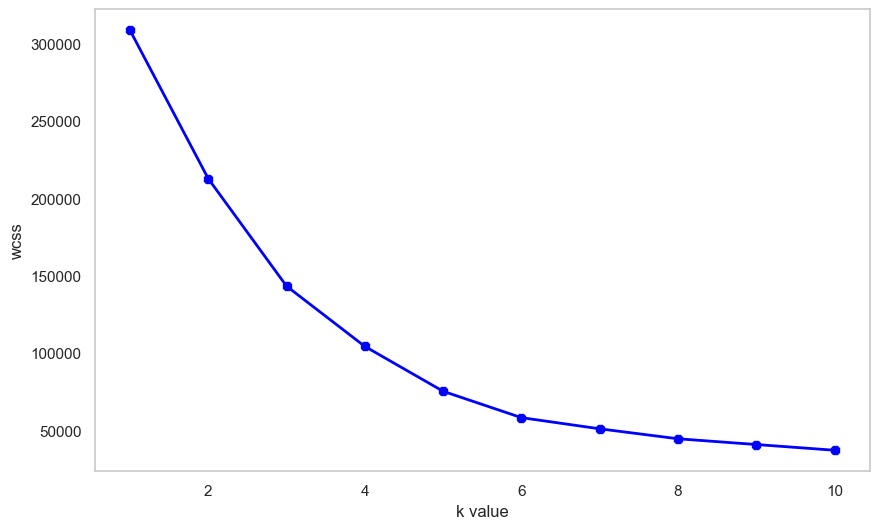

In [83]:
x3=df.iloc[:,1:]

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel("k value")
plt.ylabel('wcss')
plt.show()

In [84]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x3)
print(label)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [85]:
print(kmeans.cluster_centers_)

[[42.9375     55.0875     49.7125    ]
 [40.66666667 87.75       17.58333333]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [25.27272727 25.72727273 79.36363636]]


In [92]:
!pip install nltk


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
import nltk

In [95]:
import importlib

In [99]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
importlib.import_module('mpl_toolkits').__path__

['C:\\python\\Lib\\site-packages\\mpl_toolkits']

C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


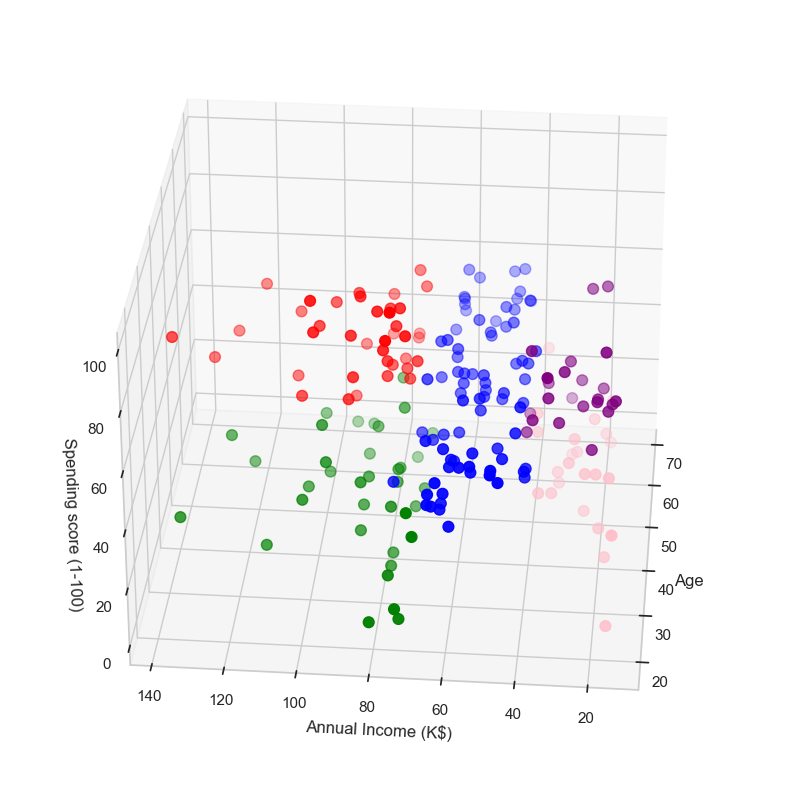

In [101]:
clusters=kmeans.fit_predict(x3)
df['label']=clusters

from mpl_toolkits.mplot3d import Axes3D

fig =plt.figure(figsize=(29,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label == 0],df['Annual Income (k$)'][df.label == 0],df["Spending Score (1-100)"][df.label == 0],c='blue', s=60)
ax.scatter(df.Age[df.label == 1],df['Annual Income (k$)'][df.label == 1],df["Spending Score (1-100)"][df.label == 1],c='red', s=60)
ax.scatter(df.Age[df.label == 2],df['Annual Income (k$)'][df.label == 2],df["Spending Score (1-100)"][df.label == 2],c='green', s=60)
ax.scatter(df.Age[df.label == 3],df['Annual Income (k$)'][df.label == 3],df["Spending Score (1-100)"][df.label == 3],c='purple', s=60)
ax.scatter(df.Age[df.label == 4],df['Annual Income (k$)'][df.label == 4],df["Spending Score (1-100)"][df.label == 4],c='pink', s=60)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (K$)")
ax.set_zlabel("Spending score (1-100)")

plt.show()